<div style="text-align: center; color: #007BFF;">
    <h1>Chronic Kideny Disease
</h1>
</div>

![](chronic-kidney-disease.jpg)

# Import Libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
!pip install xgboost

# Import Dataset

In [3]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Check Duplicate Values:

In [6]:
df.duplicated().sum()

0

In [7]:
df= df.drop(['id'],axis=1)

# Unique Values of Columns:

In [8]:
# Find the unique values in the columns
for i in df.columns:
    print("*****************************************", i ,
         "************************************************")
    print()
    print(set(df[i].tolist()))
    print()

***************************************** age ************************************************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 11.0, 12.0, 14.0, 15.0, nan, 17.0, nan, 19.0, 21.0, 20.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 22.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, nan, 73.0, 75.0, 76.0, 74.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 90.0, nan, nan, nan, nan, nan, nan}

***************************************** bp ************************************************

{0.0, nan, 140.0, nan, 50.0, 180.0, nan, 60.0, nan, nan, 70.0, nan, nan, 80.0, nan, nan, 90.0, nan, nan, 100.0, 110.0, 120.0, nan}

***************************************** sg ************************************************

{nan, 1.02, 1.005, 1.015, 1.01, 1.025, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## In many columns there are some values which doesnt fit with the numerical dataset.
- like '\t?' --> we have to convert this kind values to Nan
- like '\t4600' --> we have to convert it into only numerical

In [9]:
# Treat specific values in the 'Packed Cell Volume' column
df['pcv'] = df['pcv'].replace('\t?', float('nan'))
df['pcv'] = df['pcv'].str.replace('\t', '').astype(float)

In [10]:
df['rc'] = df['rc'].replace('\t?', float('nan'))

In [11]:
df['wc'] = df['wc'].replace('\t?', float('nan'))
df['wc'] = df['wc'].str.replace('\t', '').astype(float)

In [12]:
# Treat specific values in the 'dm' column
df['dm'] = df['dm'].replace('\tno', 'no')
df['dm'] = df['dm'].replace('\tyes', 'yes')

In [13]:
df['cad'] = df['cad'].replace('\tno', 'no')

In [14]:
df['wc'] = df['wc'].astype(str)
df['wc'] = df['wc'].replace('\t?', float('nan'))
df['wc'] = df['wc'].str.replace('\t', '').astype(float)

In [15]:
df['classification'] = df['classification'].str.strip()  # Remove leading/trailing whitespace


# Check Null Values:

In [16]:
df.isnull().sum()/len(df)*100

age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.75
wc                26.50
rc                32.75
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

- *This is clinical sector dataset so it will be unfair to drop the coloumns which have more thaan 25% null values.*

# Treating Null Values:

In [17]:
from sklearn.impute import SimpleImputer

# Treat Null Values in Numerical Columns using SimpleImputer

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Treat Null Values in Categorical Columns using SimpleImputer
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [18]:
df.isnull().sum()/len(df)*100

age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

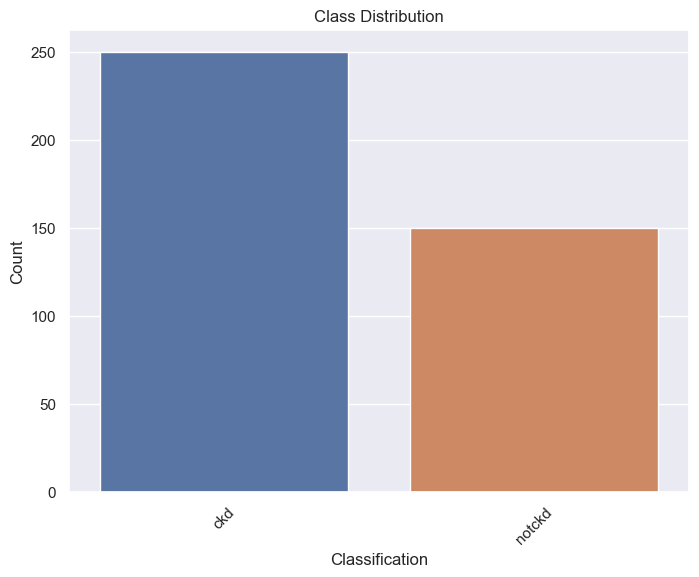

In [19]:
# Display the count of unique values in the classification column
class_counts = df['classification'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [21]:
new_column_names = {
    'age': 'Age',
    'bp': 'Blood Pressure',
    'sg': 'Specific Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red Blood Cells',
    'pc': 'Pus Cell',
    'pcc': 'Pus Cell Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood Glucose Random',
    'bu': 'Blood Urea',
    'sc': 'Serum Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed Cell Volume',
    'wc': 'White Blood Cell Count',
    'rc': 'Red Blood Cell Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes Mellitus',
    'cad': 'Coronary Artery Disease',
    'appet': 'Appetite',
    'pe': 'Pedal Edema',
    'ane': 'Anemia',
    'classification': 'Class'
}

# Rename columns using the new names
df = df.rename(columns=new_column_names)


In [22]:
df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# Visualization:

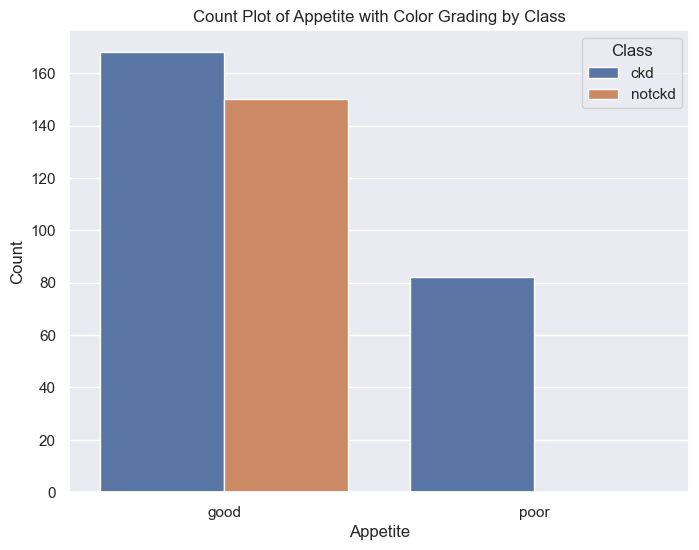

In [23]:
# Count Plot of Appetite with Color Grading by Class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Appetite', hue='Class')
plt.title('Count Plot of Appetite with Color Grading by Class')
plt.xlabel('Appetite')
plt.ylabel('Count')
plt.show()

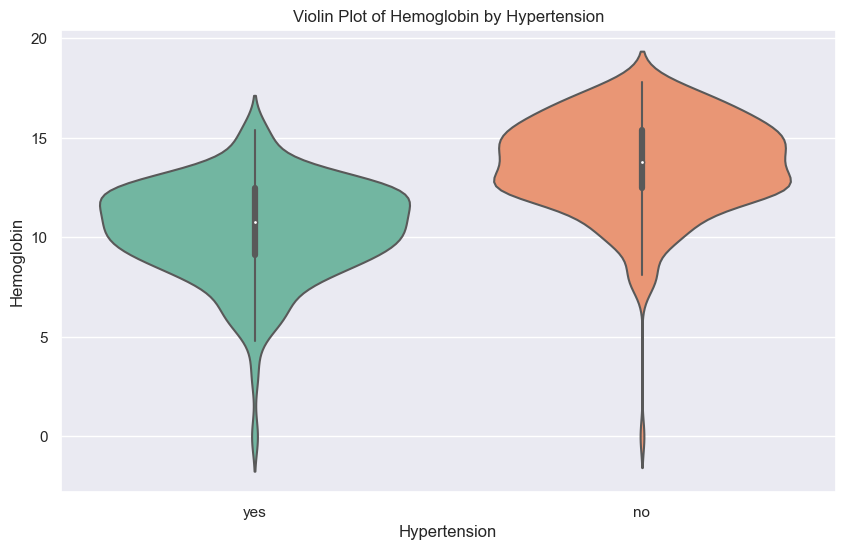

In [24]:
# Violin Plot of Hemoglobin by Hypertension
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Hypertension', y='Hemoglobin', palette='Set2')
plt.title('Violin Plot of Hemoglobin by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Hemoglobin')
plt.show()

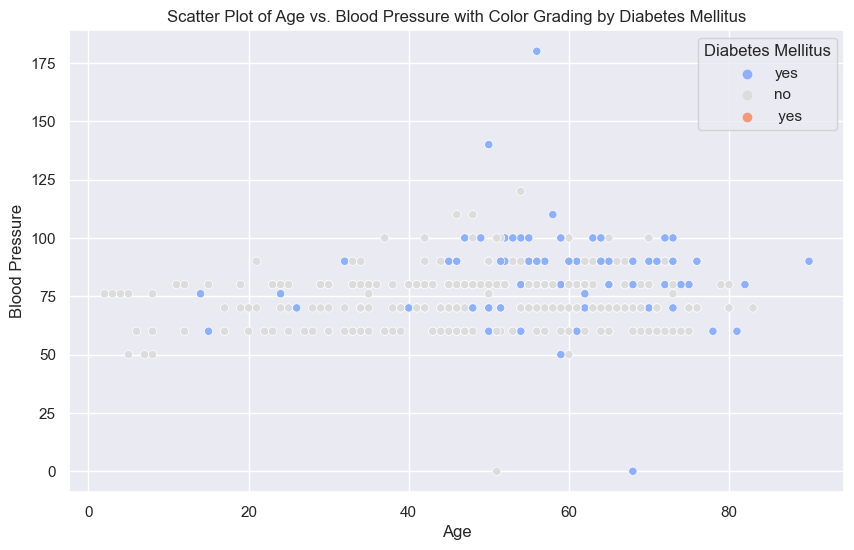

In [25]:
# Scatter Plot of Age vs. Blood Pressure with Color Grading by Diabetes Mellitus
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Blood Pressure', hue='Diabetes Mellitus', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Blood Pressure with Color Grading by Diabetes Mellitus')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Diabetes Mellitus')
plt.show()

In [26]:
from mpl_toolkits.mplot3d import Axes3D

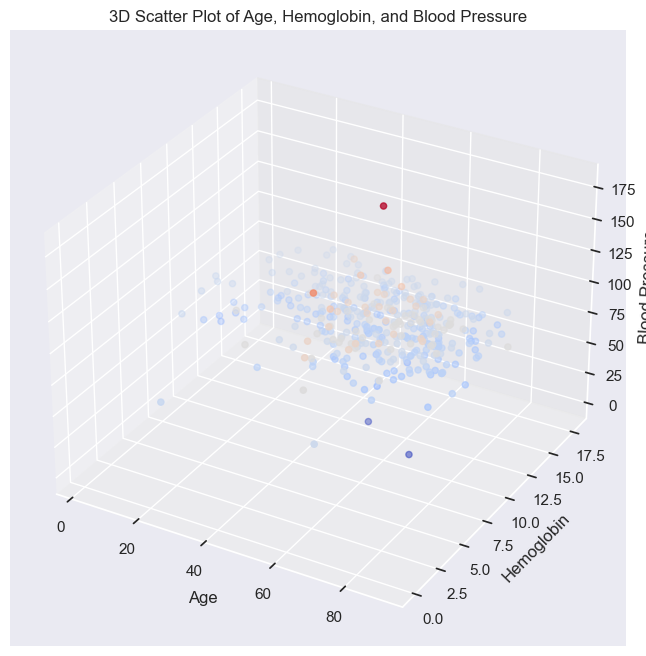

In [27]:
# Select data for the 3D plot
x = df['Age']
y = df['Hemoglobin']
z = df['Blood Pressure']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='coolwarm')

# Set labels for axes
ax.set_xlabel('Age')
ax.set_ylabel('Hemoglobin')
ax.set_zlabel('Blood Pressure')

# Set title
ax.set_title('3D Scatter Plot of Age, Hemoglobin, and Blood Pressure')

# Show the plot
plt.show()

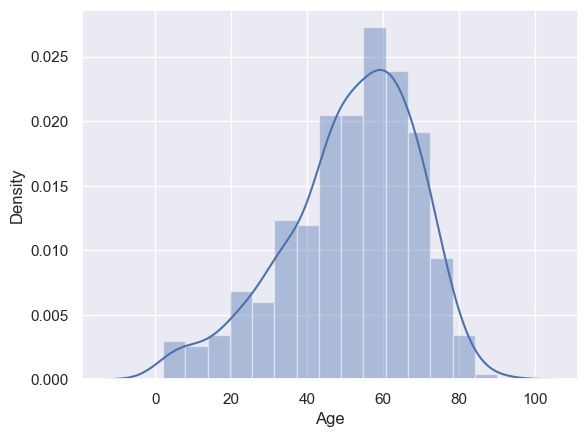

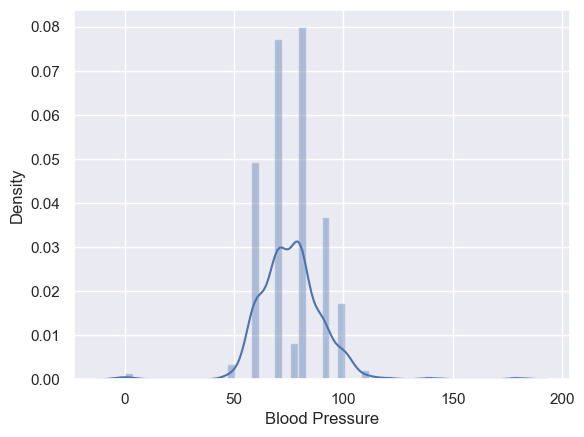

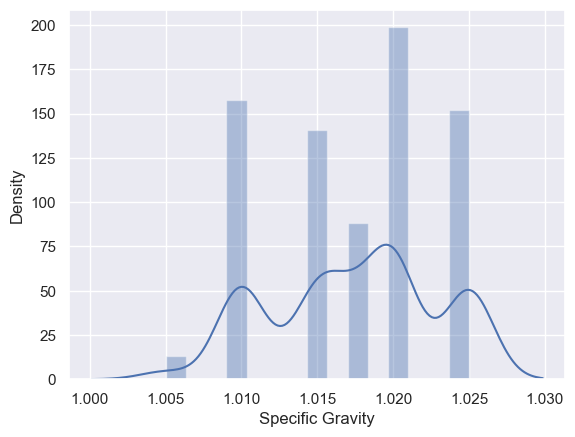

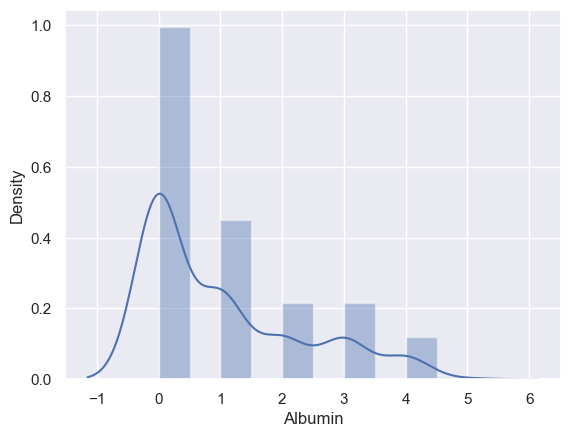

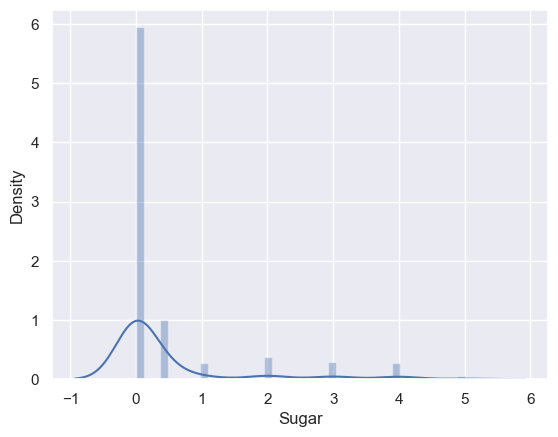

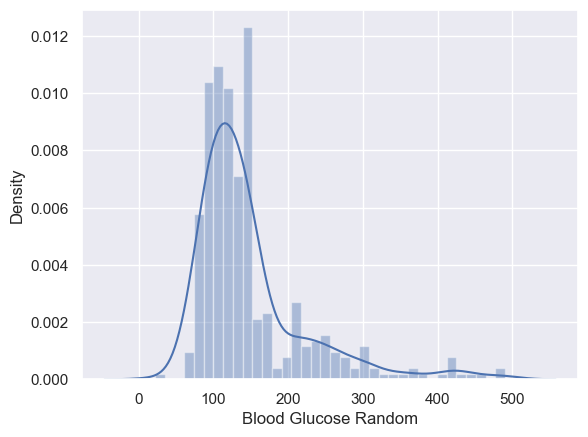

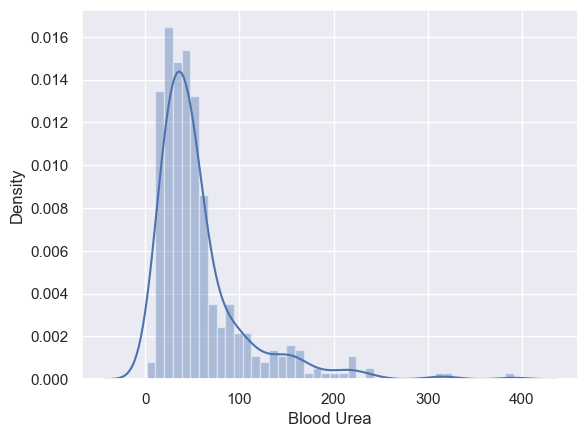

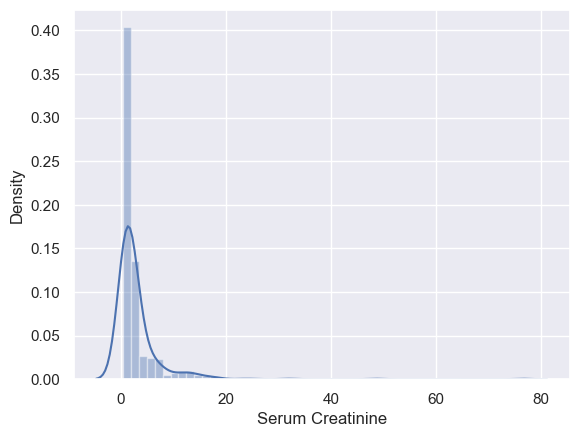

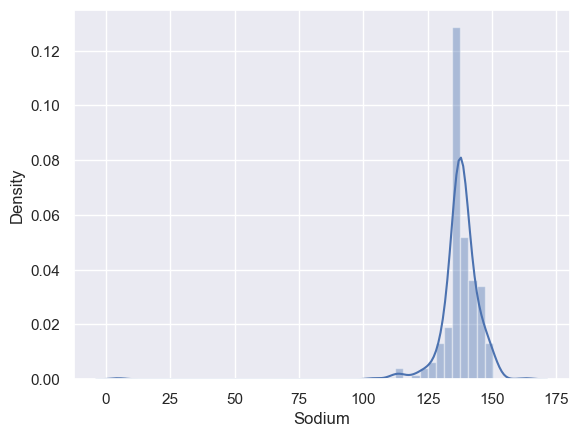

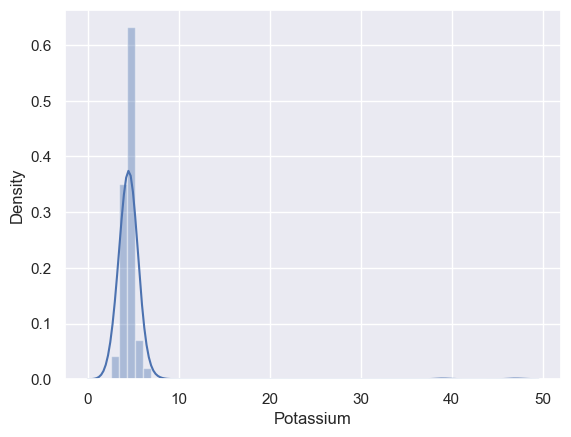

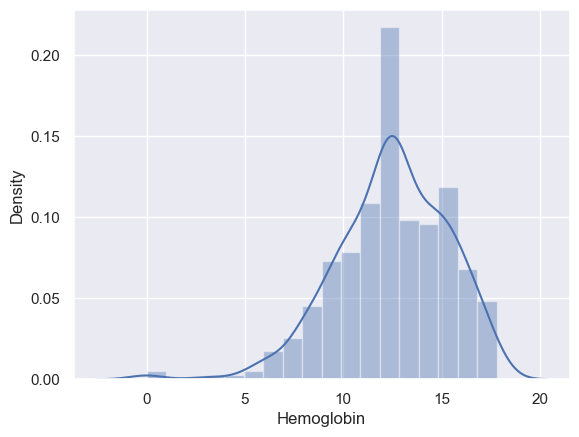

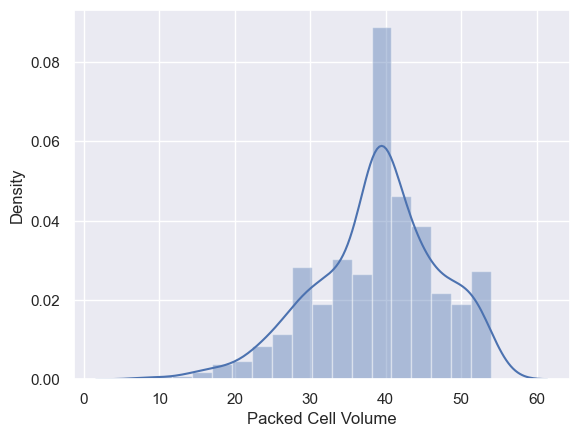

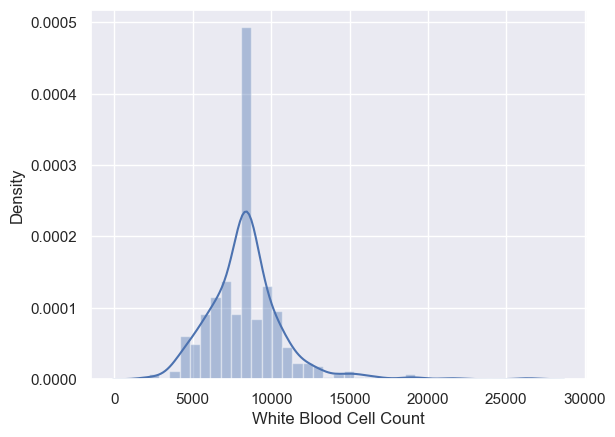

In [28]:
# Find the distribution of the dataset
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    distplots(i)

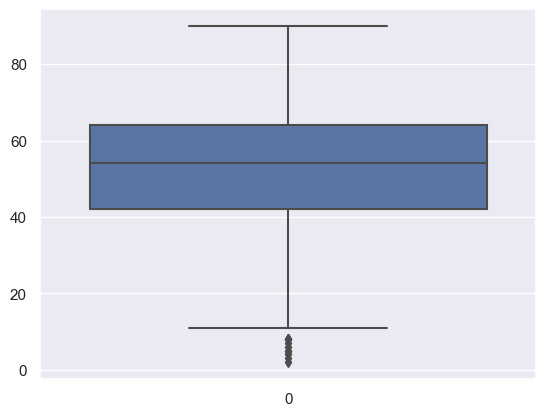

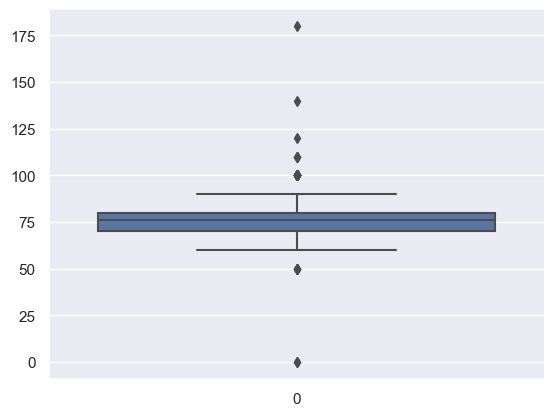

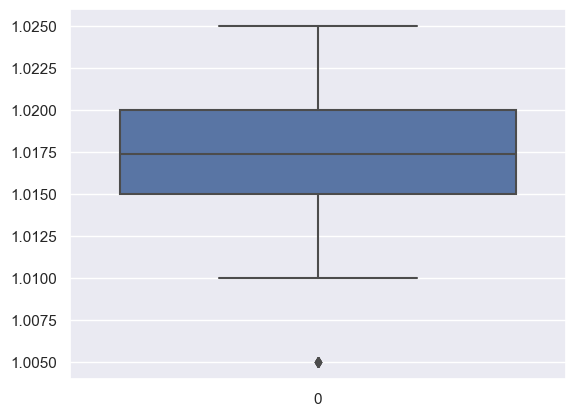

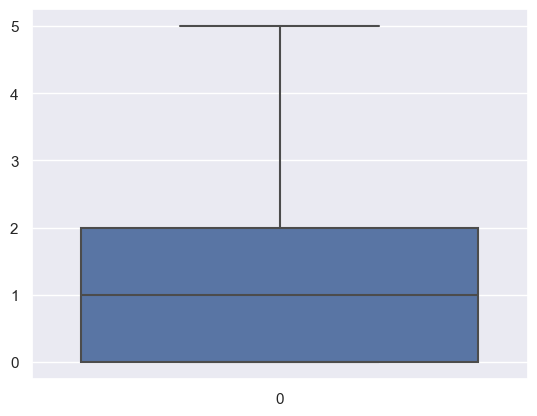

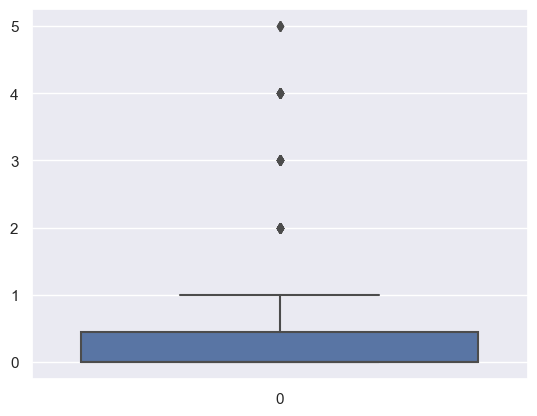

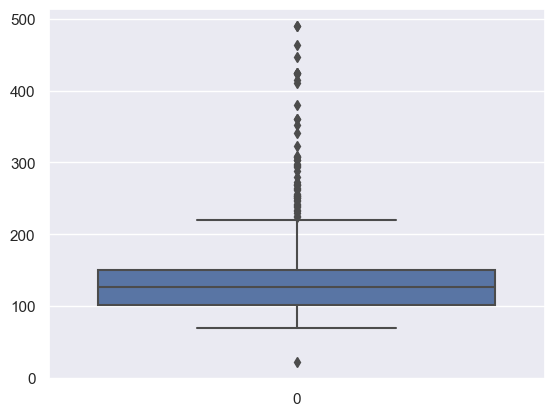

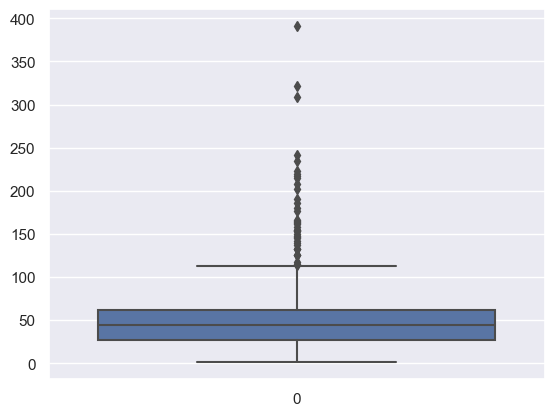

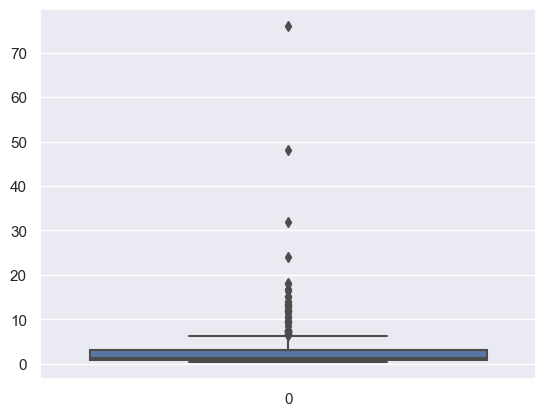

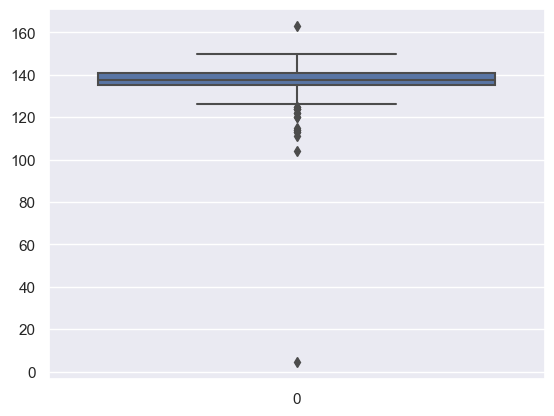

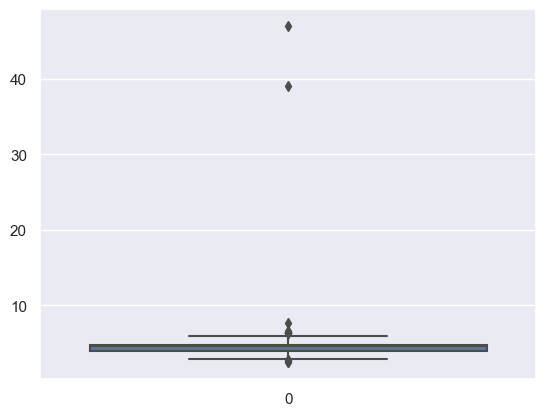

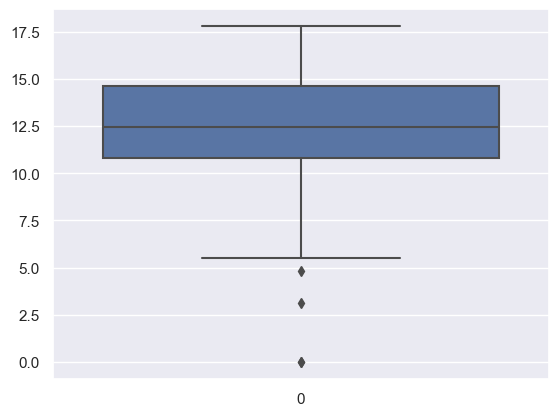

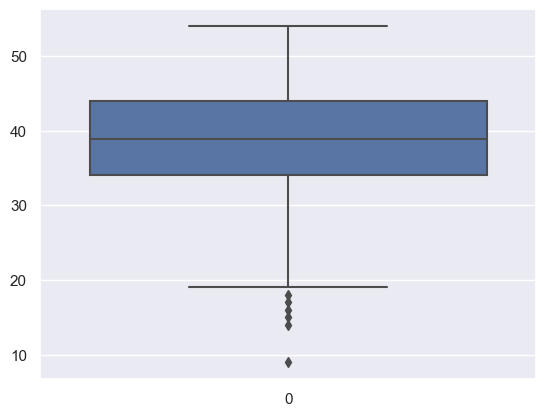

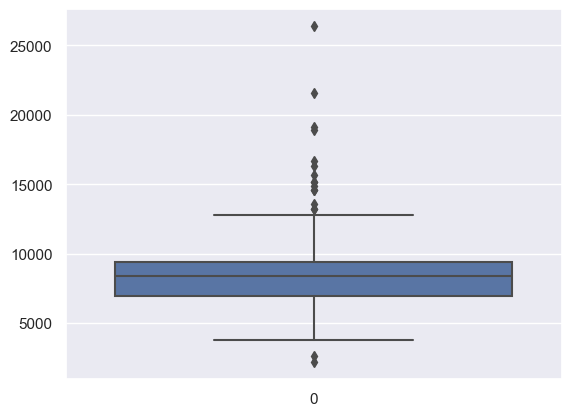

In [29]:
# Find the outlier
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

- **It is clinical sector dataset so outlier present is normal**

# Encoding:

In [30]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco = df.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,40,5,4,1,0,1,1,0,0,48,...,32,35,30,1,2,0,0,0,0,0
1,5,1,4,5,0,1,1,0,0,70,...,25,19,30,0,1,0,0,0,0,0
2,55,5,1,3,4,1,1,0,0,141,...,18,33,30,0,2,0,1,0,1,0
3,40,3,0,5,0,1,0,1,0,44,...,19,25,17,1,1,0,1,1,1,0
4,43,0,1,3,0,1,1,0,0,33,...,22,31,24,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,48,5,4,0,0,1,1,0,0,64,...,35,25,27,0,1,0,0,0,0,1
396,34,3,5,0,0,1,1,0,0,3,...,42,35,40,0,1,0,0,0,0,1
397,8,5,4,0,0,1,1,0,0,27,...,37,24,32,0,1,0,0,0,0,1
398,11,2,5,0,0,1,1,0,0,41,...,39,30,37,0,1,0,0,0,0,1


# Finding Correlation:

<Axes: >

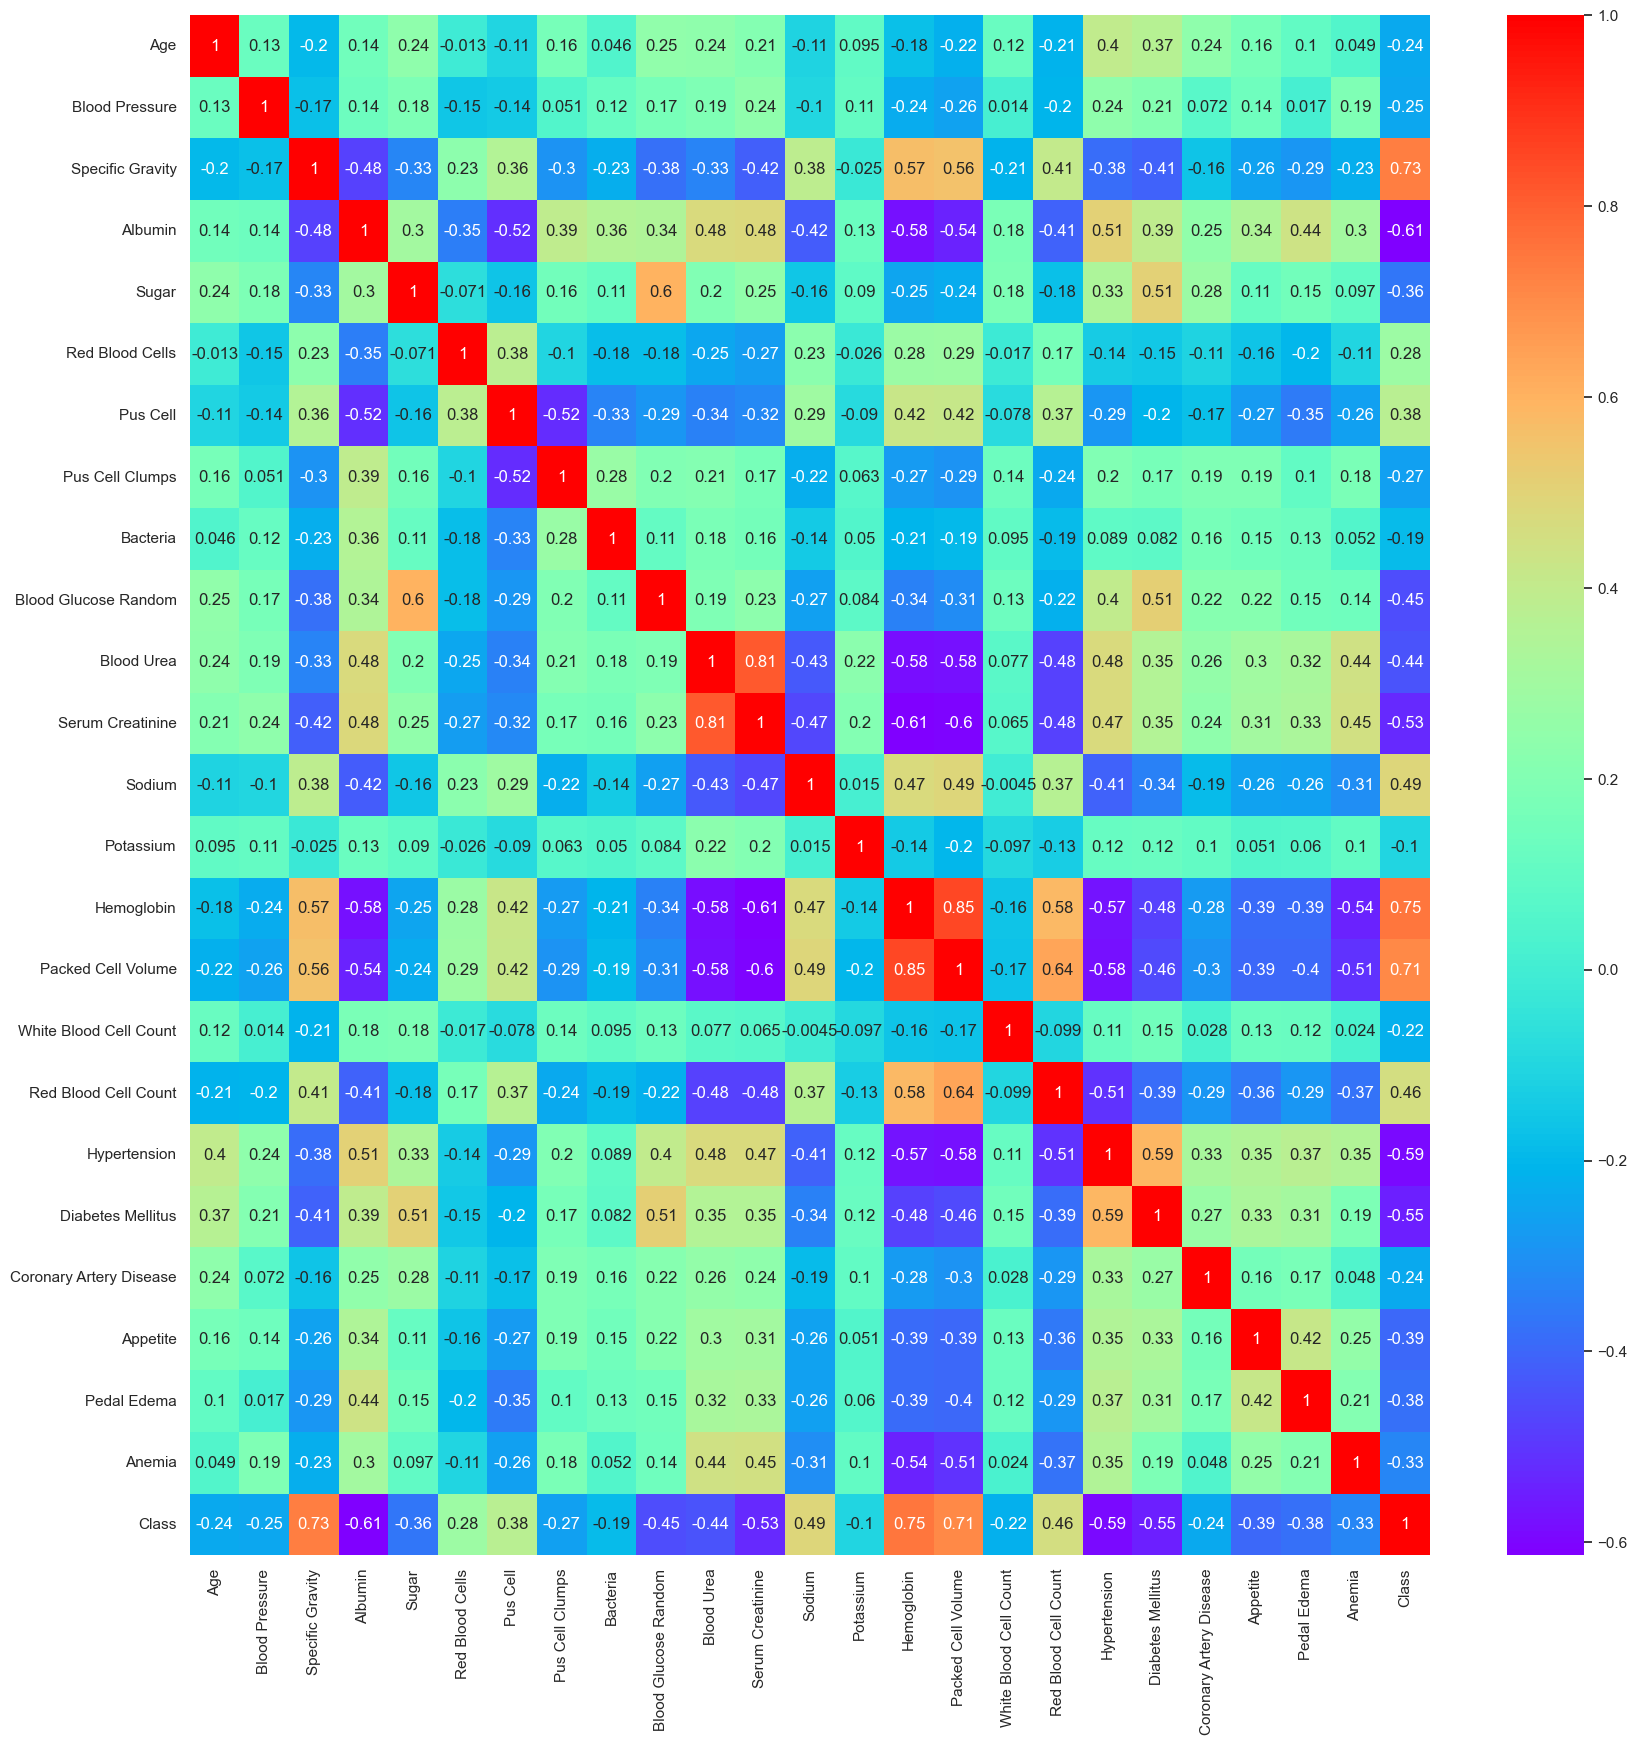

In [31]:
plt.figure(figsize=(20,20))
corr = df_enco.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

In [32]:
# seperate independent and dependent variables and drop the ID column

x = df_enco.drop(['Class'], axis=1)
y = df_enco[['Class']]

In [33]:
x.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,40,5,4,1,0,1,1,0,0,48,...,91,32,35,30,1,2,0,0,0,0
1,5,1,4,5,0,1,1,0,0,70,...,49,25,19,30,0,1,0,0,0,0
2,55,5,1,3,4,1,1,0,0,141,...,32,18,33,30,0,2,0,1,0,1
3,40,3,0,5,0,1,0,1,0,44,...,48,19,25,17,1,1,0,1,1,1
4,43,0,1,3,0,1,1,0,0,33,...,52,22,31,24,0,1,0,0,0,0


In [34]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [35]:
y.value_counts()/len(y)*100

Class
0        62.5
1        37.5
dtype: float64

- **There is little/ no imbalancy is present so we dont need to treat that part.**

# Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x)
y=y

In [37]:
x

array([[ 0.05263158, -0.09090909,  0.6       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86842105, -0.81818182,  0.6       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44736842, -0.09090909, -0.6       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [-0.78947368, -0.09090909,  0.6       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.71052632, -0.63636364,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.34210526, -0.09090909,  1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [38]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


# Split the data into training and test for model building:

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Models

In [41]:
# LogisticRegression
lr = LogisticRegression()

In [42]:
# DecisionTree
dtree = DecisionTreeClassifier()

In [43]:
# RandomForest
rf= RandomForestClassifier()

In [44]:
# BaggingClassifier
bagg = BaggingClassifier()

In [45]:
# KNN
knn = KNeighborsClassifier()

In [46]:
#SVM
#kernel - linear
svc = SVC()

In [47]:
#Naive Bayes Theorem
# GaussianNB
naive_gb = GaussianNB()
# BernoulliNB
naive_bn = BernoulliNB()

In [48]:
# AdaBoostClassifier
ada = AdaBoostClassifier()

In [49]:
# GradientBoostingClassifier
gdb = GradientBoostingClassifier()

In [50]:
# XGBClassifier
xgb = XGBClassifier()

In [51]:
models=[('Logistic',lr),('DecisionTress',dtree),('Randomforest', rf),('Bagging', bagg),('Adaboost',ada),
            ('GradientBoosting', gdb),('XGBoosting', xgb),('SVM', svc),('KNN', knn),
            ('GaussianNB', naive_gb),('BernoulliNB', naive_bn)]

evc = VotingClassifier(estimators= models , voting='hard')

In [52]:
models=[('Logistic',lr),('DecisionTress',dtree),('Randomforest', rf),('Bagging', bagg),('Adaboost',ada),
            ('GradientBoosting', gdb),('XGBoosting', xgb),('SVM', svc),('KNN', knn),
            ('GaussianNB', naive_gb),('BernoulliNB', naive_bn), ('Votting',evc)]

for model_name, model in models:
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print("-" * 50)

Model: Logistic
Train Accuracy: 0.99
Test Accuracy: 1.00
--------------------------------------------------
Model: DecisionTress
Train Accuracy: 1.00
Test Accuracy: 0.94
--------------------------------------------------
Model: Randomforest
Train Accuracy: 1.00
Test Accuracy: 0.97
--------------------------------------------------
Model: Bagging
Train Accuracy: 1.00
Test Accuracy: 0.98
--------------------------------------------------
Model: Adaboost
Train Accuracy: 1.00
Test Accuracy: 1.00
--------------------------------------------------
Model: GradientBoosting
Train Accuracy: 1.00
Test Accuracy: 0.96
--------------------------------------------------
Model: XGBoosting
Train Accuracy: 1.00
Test Accuracy: 1.00
--------------------------------------------------
Model: SVM
Train Accuracy: 0.99
Test Accuracy: 1.00
--------------------------------------------------
Model: KNN
Train Accuracy: 0.98
Test Accuracy: 0.99
--------------------------------------------------
Model: GaussianNB
Tr

## Cross Validation on accuracy:

In [53]:
from sklearn.model_selection import cross_val_score

for model_name, model in models:
    cv_train_scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    cv_test_scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    
    mean_train_accuracy = cv_train_scores.mean()
    mean_test_accuracy = cv_test_scores.mean()
    
    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Train Accuracy: {mean_train_accuracy:.2f}")
    print(f"Cross-Validation Mean Test Accuracy: {mean_test_accuracy:.2f}")
    print("-" * 50)

Model: Logistic
Cross-Validation Mean Train Accuracy: 0.99
Cross-Validation Mean Test Accuracy: 0.99
--------------------------------------------------
Model: DecisionTress
Cross-Validation Mean Train Accuracy: 0.96
Cross-Validation Mean Test Accuracy: 0.96
--------------------------------------------------
Model: Randomforest
Cross-Validation Mean Train Accuracy: 0.99
Cross-Validation Mean Test Accuracy: 0.99
--------------------------------------------------
Model: Bagging
Cross-Validation Mean Train Accuracy: 0.98
Cross-Validation Mean Test Accuracy: 0.98
--------------------------------------------------
Model: Adaboost
Cross-Validation Mean Train Accuracy: 0.99
Cross-Validation Mean Test Accuracy: 0.99
--------------------------------------------------
Model: GradientBoosting
Cross-Validation Mean Train Accuracy: 0.98
Cross-Validation Mean Test Accuracy: 0.98
--------------------------------------------------
Model: XGBoosting
Cross-Validation Mean Train Accuracy: 0.99
Cross-Valid

## ROC-AUC Curve for each models:

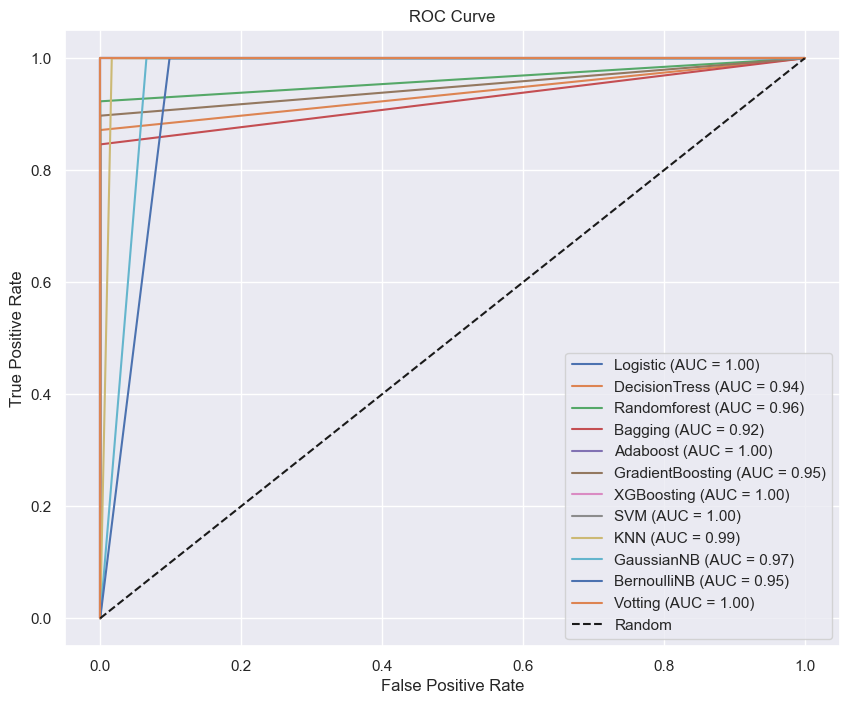

In [54]:
# Plot ROC curves and calculate AUC for each model
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(figsize=(10, 8))

for model_name, model in models:
    model.fit(x_train, y_train)
    
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    auc_score = roc_auc_score(y_test, y_pred_test)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

## Confusion Matrix:

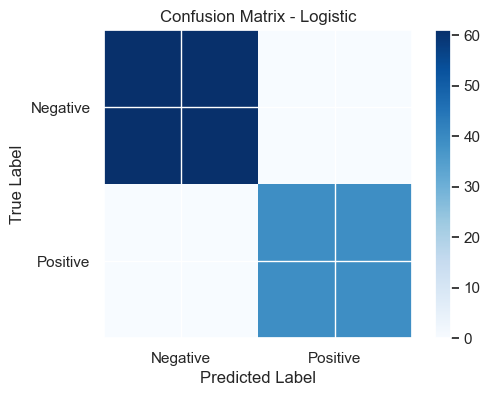

Model: Logistic
True Negative: 61
False Positive: 0
False Negative: 0
True Positive: 39
--------------------------------------------------


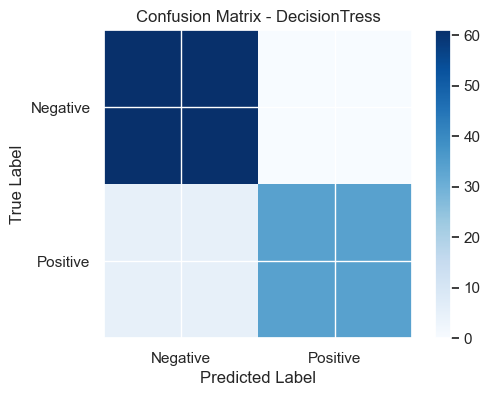

Model: DecisionTress
True Negative: 61
False Positive: 0
False Negative: 5
True Positive: 34
--------------------------------------------------


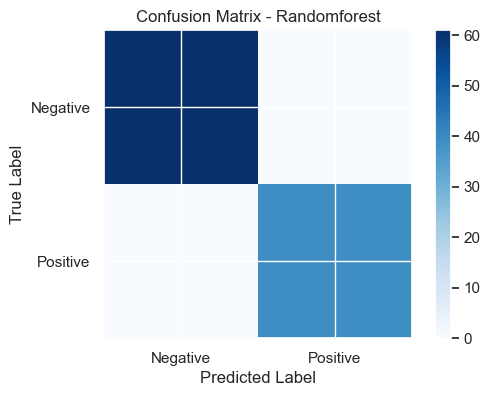

Model: Randomforest
True Negative: 61
False Positive: 0
False Negative: 0
True Positive: 39
--------------------------------------------------


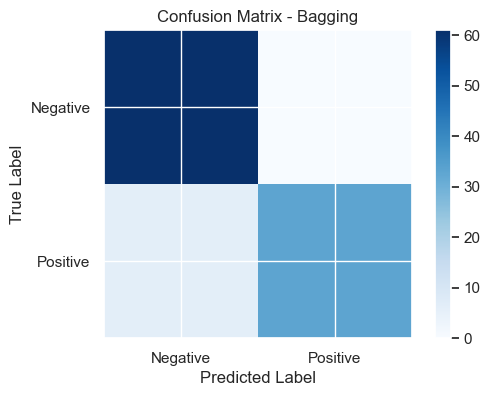

Model: Bagging
True Negative: 61
False Positive: 0
False Negative: 6
True Positive: 33
--------------------------------------------------


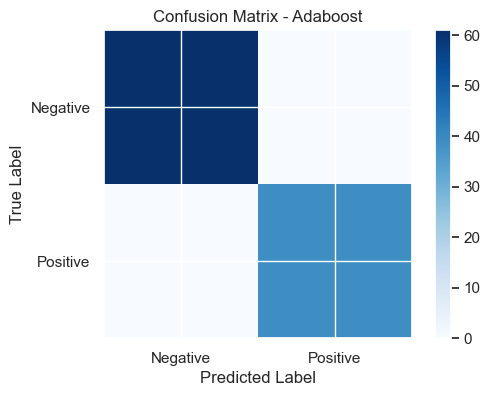

Model: Adaboost
True Negative: 61
False Positive: 0
False Negative: 0
True Positive: 39
--------------------------------------------------


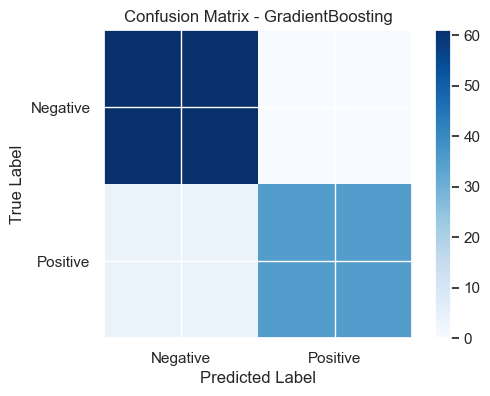

Model: GradientBoosting
True Negative: 61
False Positive: 0
False Negative: 4
True Positive: 35
--------------------------------------------------


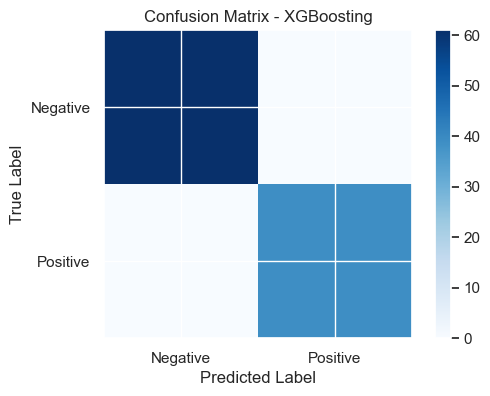

Model: XGBoosting
True Negative: 61
False Positive: 0
False Negative: 0
True Positive: 39
--------------------------------------------------


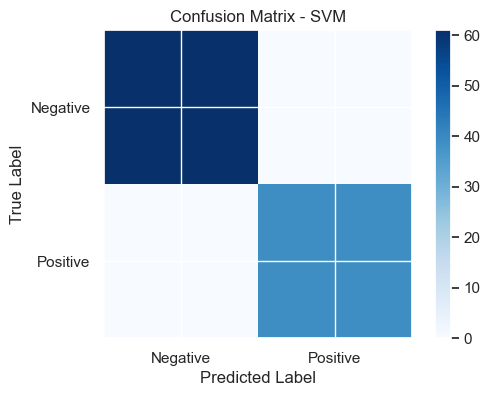

Model: SVM
True Negative: 61
False Positive: 0
False Negative: 0
True Positive: 39
--------------------------------------------------


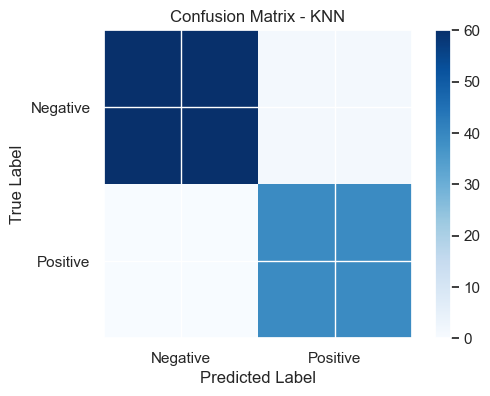

Model: KNN
True Negative: 60
False Positive: 1
False Negative: 0
True Positive: 39
--------------------------------------------------


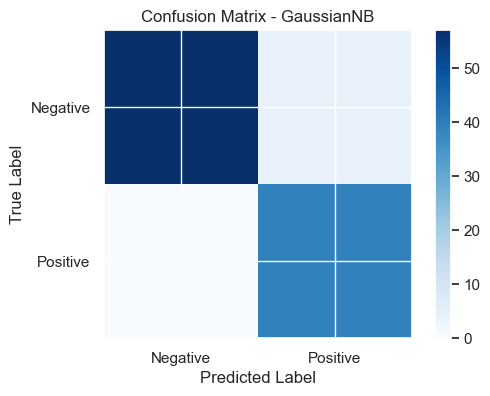

Model: GaussianNB
True Negative: 57
False Positive: 4
False Negative: 0
True Positive: 39
--------------------------------------------------


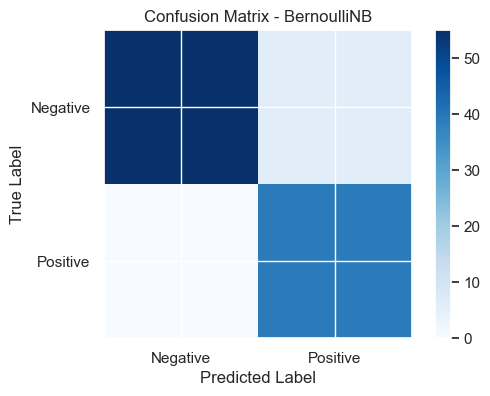

Model: BernoulliNB
True Negative: 55
False Positive: 6
False Negative: 0
True Positive: 39
--------------------------------------------------


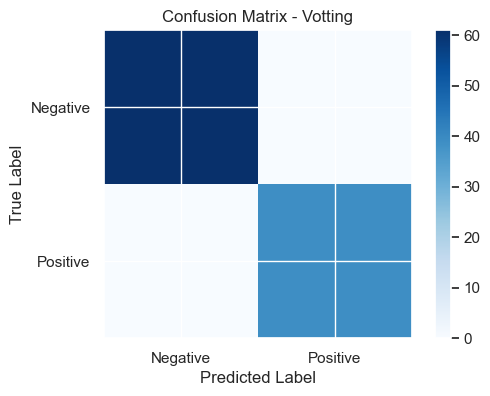

Model: Votting
True Negative: 61
False Positive: 0
False Negative: 0
True Positive: 39
--------------------------------------------------


In [55]:
for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xticks(np.arange(2), ['Negative', 'Positive'])
    plt.yticks(np.arange(2), ['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print(f"Model: {model_name}")
    print(f"True Negative: {tn}")
    print(f"False Positive: {fp}")
    print(f"False Negative: {fn}")
    print(f"True Positive: {tp}")
    print("-" * 50)

## Compare F1 Score, Precession, Recall values of each model:

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

for model_name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("-" * 50)

Model: Logistic
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
--------------------------------------------------
Model: DecisionTress
F1 Score: 0.93
Precision: 1.00
Recall: 0.87
--------------------------------------------------
Model: Randomforest
F1 Score: 0.97
Precision: 1.00
Recall: 0.95
--------------------------------------------------
Model: Bagging
F1 Score: 0.95
Precision: 1.00
Recall: 0.90
--------------------------------------------------
Model: Adaboost
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
--------------------------------------------------
Model: GradientBoosting
F1 Score: 0.95
Precision: 1.00
Recall: 0.90
--------------------------------------------------
Model: XGBoosting
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
--------------------------------------------------
Model: SVM
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
--------------------------------------------------
Model: KNN
F1 Score: 0.99
Precision: 0.97
Recall: 1.00
--------------------------------------------

## Evaluate Each models with their Scores:

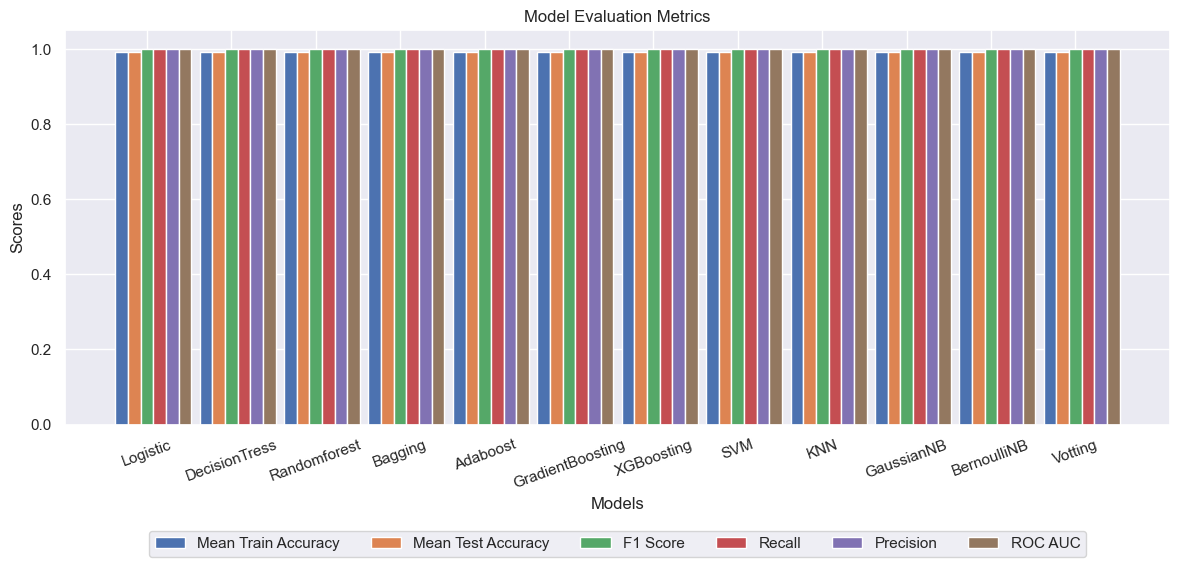

In [57]:
metrics = {
    'Mean Train Accuracy': [], 'Mean Test Accuracy': [],
    'F1 Score': [], 'Recall': [], 'Precision': [], 'ROC AUC': []
}
metrics['Mean Train Accuracy'].append(mean_train_accuracy)
metrics['Mean Test Accuracy'].append(mean_test_accuracy)
metrics['F1 Score'].append(f1)
metrics['Recall'].append(recall)
metrics['Precision'].append(precision)
metrics['ROC AUC'].append(auc_score)
    
    # Create a bar plot for each metric
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15
x = np.arange(len(models))

for idx, metric_name in enumerate(metrics.keys()):
    ax.bar(x + (idx - 2) * width, metrics[metric_name], width, label=metric_name)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels([model[0] for model in models])
plt.xticks(rotation=20)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(metrics))
ax.autoscale_view()

plt.tight_layout()  # Adjust layout to avoid overlapping


plt.show()

### Conclusion:
- Overall, many of the models have shown promising accuracy on both training and test datasets. Logistic Regression, AdaBoost, XGBoost, and the Voting Classifier stand out with perfect accuracy scores.